In [1]:
import warnings; warnings.simplefilter('ignore')
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import requests
import zipfile as zi 
from io import BytesIO as sio
from sklearn import datasets, linear_model
import scipy.special as scsp
import math
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
url = 'https://realized.oxford-man.ox.ac.uk/images/oxfordmanrealizedvolatilityindices-0.2-final.zip'
data = requests.get(url, stream=True).content

In [4]:
z = zi.ZipFile(sio(data))
z.extractall()

In [5]:
df = pd.read_csv('OxfordManRealizedVolatilityIndices.csv', index_col=0, header=2 )
rv1 = pd.DataFrame(index=df.index)
for col in df.columns:
    if col[-3:] == '.rk':
        rv1[col] = df[col]
rv1.index = [dt.datetime.strptime(str(date), "%Y%m%d") for date in rv1.index.values]

In [24]:
import pandas_datareader as web

Text(0.5, 1.0, 'SPX realized variance')

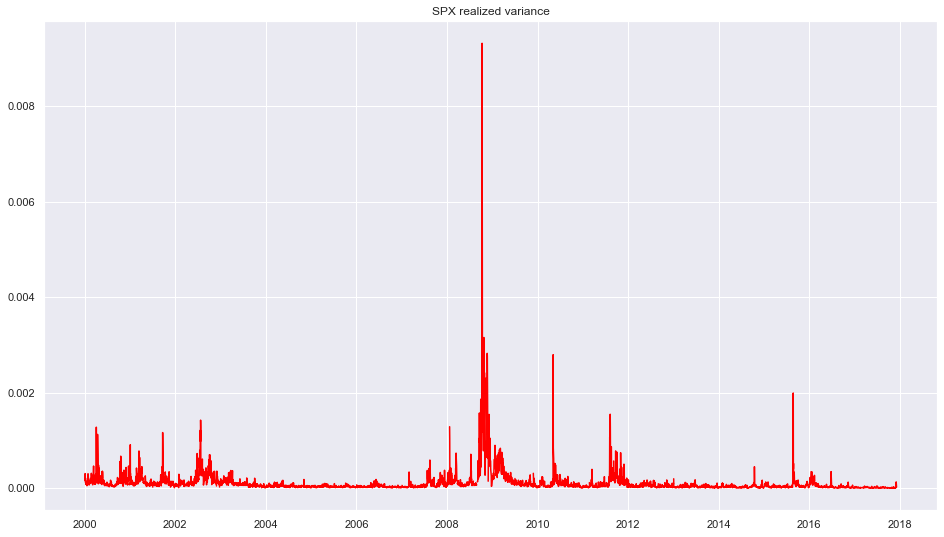

In [239]:
plt.figure(figsize=(16,9))
plt.plot(spx.index, spx["SPX2.rk"].values, color='red')
plt.title('SPX realized variance')
#plt.ylim(1,0.3)

In [82]:
spx.head()

,SPX2.rk,sqrt,log_sqrt
2000-01-03,0.000161,0.012678,-4.367903
2000-01-04,0.000264,0.016260,-4.119030
2000-01-05,0.000305,0.017454,-4.048173
2000-01-06,0.000149,0.012189,-4.407187
2000-01-07,0.000123,0.011103,-4.500579


In [79]:
spx.tail()

,SPX2.rk,sqrt,log_sqrt
2017-11-29,0.000017,0.004118,-5.492414
2017-11-30,0.000020,0.004526,-5.397814
2017-12-01,0.000130,0.011407,-4.473531
2017-12-04,0.000023,0.004802,-5.338719
2017-12-05,NaN,NaN,NaN


In [107]:
spx.sum()

SPX2.rk         0.481720
sqrt           38.197628
log_sqrt   -22099.921446
dtype: float64

Text(0.5, 1.0, 'SPX')

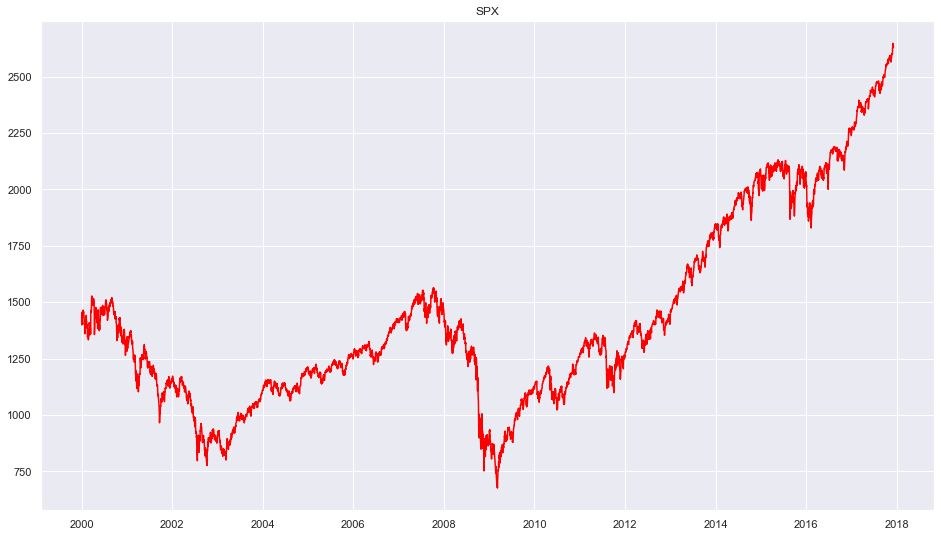

In [30]:
SPX = web.DataReader(name = '^GSPC',data_source = 'yahoo', start='2000-01-01', end=spx.index[-1])
SPX = SPX['Adj Close']
plt.figure(figsize=(16,9))
plt.plot(SPX.index, SPX.values, color='red')
plt.title('SPX')

In [ ]:
Var = sum(x_i - x_bar)**2/N
mean = (x+x+x+x)/N

m = abs(log_vol/log_vol_y)**2

In [31]:
spx['sqrt']= np.sqrt(spx['SPX2.rk'])
spx['log_sqrt'] = np.log(spx['sqrt'])

def del_Raw(q, x): 
    return [np.mean(np.abs(spx['log_sqrt'] - spx['log_sqrt'].shift(lag)) ** q)
            for lag in x]

In [240]:
spx

,SPX2.rk,sqrt,log_sqrt
2000-01-03,0.000161,0.012678,-4.367903
2000-01-04,0.000264,0.016260,-4.119030
2000-01-05,0.000305,0.017454,-4.048173
2000-01-06,0.000149,0.012189,-4.407187
2000-01-07,0.000123,0.011103,-4.500579
2000-01-10,0.000131,0.011432,-4.471328
2000-01-11,0.000077,0.008764,-4.737132
2000-01-12,0.000122,0.011054,-4.504924
2000-01-13,0.000110,0.010491,-4.557260
2000-01-14,0.000144,0.011985,-4.424104


[0.06978904021684623, 0.13658945475277, 0.20015260544030933, 0.2604388133907091, 0.37125103013938054]


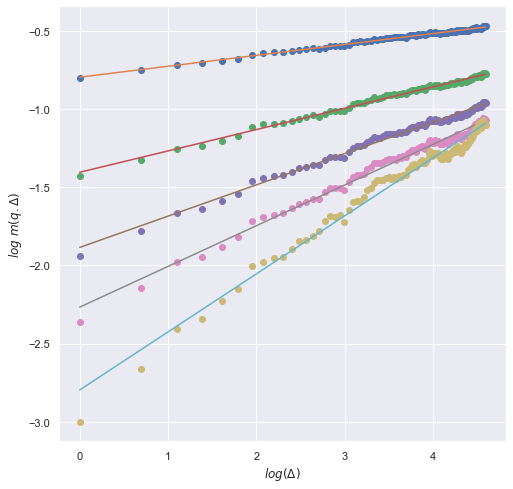

In [101]:
plt.figure(figsize=(8, 8))
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q.\Delta)$')
plt.ylim=(-3, -.5)

zeta_q = list()
qVec = np.array([.5, 1, 1.5, 2, 3])
x = np.arange(1, 100)
for q in qVec:
    plt.plot(np.log(x), np.log(del_Raw(q, x)), 'o') 
    model = np.polyfit(np.log(x), np.log(del_Raw(q, x)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1])
    zeta_q.append(model[0])
    
print (zeta_q) # this is the regression slope through all the points

0.12710249404182558


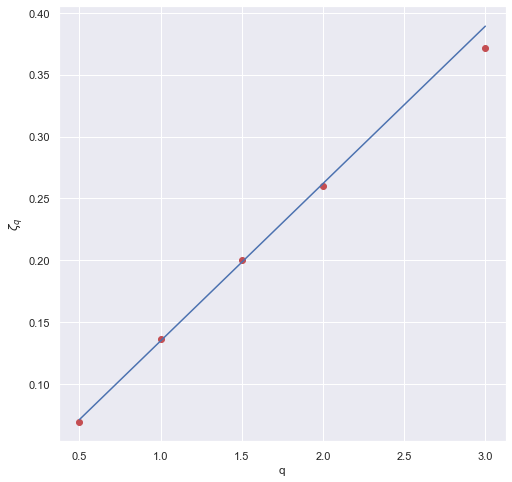

In [34]:
plt.figure(figsize=(8,8))
plt.xlabel('q')
plt.ylabel('$\zeta_{q}$')
plt.plot(qVec, zeta_q, 'or')

line = np.polyfit(qVec[:4], zeta_q[:4],1)
plt.plot(qVec, line[0] * qVec + line[1])
h_est= line[0]
print(h_est)

In [154]:
np.polyfit(qVec, zeta_q,1)

array([0.12032165, 0.01512956])

In [242]:
np.mean(zeta_q/qVec)

0.13271447111103002

In [39]:
def dlsig2(sic, x, pr=False):
    if pr:
        a= np.array([(sig-sig.shift(lag)).dropna() for lag in x])
        a=a ** 2
        print (a.info())
    return [np.mean((sig-sig.shift(lag)).dropna() ** 2) for lag in x]

In [134]:
rv1.columns

Index(['SPX2.rk', 'FTSE2.rk', 'N2252.rk', 'GDAXI2.rk', 'RUT2.rk', 'AORD2.rk',
       'DJI2.rk', 'IXIC2.rk', 'FCHI2.rk', 'HSI2.rk', 'KS11.rk', 'AEX.rk',
       'SSMI.rk', 'IBEX2.rk', 'NSEI.rk', 'MXX.rk', 'BVSP.rk', 'GSPTSE.rk',
       'STOXX50E.rk', 'FTSTI.rk', 'FTSEMIB.rk'],
      dtype='object')

In [ ]:
# Explanations POLYFIT

slope, intercept = np.polyfit(y, x, 1)

In [158]:
rv1.columns

Index(['SPX2.rk', 'FTSE2.rk', 'N2252.rk', 'GDAXI2.rk', 'RUT2.rk', 'AORD2.rk',
       'DJI2.rk', 'IXIC2.rk', 'FCHI2.rk', 'HSI2.rk', 'KS11.rk', 'AEX.rk',
       'SSMI.rk', 'IBEX2.rk', 'NSEI.rk', 'MXX.rk', 'BVSP.rk', 'GSPTSE.rk',
       'STOXX50E.rk', 'FTSTI.rk', 'FTSEMIB.rk'],
      dtype='object')

In [137]:
h = list()
nu = list()

for col in rv1.columns:
    sig = rv1[col]
    sig = np.log(np.sqrt(sig))
    sig = sig.dropna()
    model = np.polyfit(np.log(x), np.log(dlsig2(sig, x)), 1)
    nu.append(np.sqrt(np.exp(model[1])))
    h.append(model[0]/2.)
    
OxfordH = pd.DataFrame({'names':rv1.columns, 'h_est': h, 'nu_est': nu})

In [138]:
OxfordH

,names,h_est,nu_est
0,SPX2.rk,0.129279,0.324802
1,FTSE2.rk,0.140566,0.267038
2,N2252.rk,0.110684,0.326482
3,GDAXI2.rk,0.145953,0.277026
4,RUT2.rk,NaN,NaN
5,AORD2.rk,0.081706,0.358325
6,DJI2.rk,0.127363,0.318882
7,IXIC2.rk,NaN,NaN
8,FCHI2.rk,0.127367,0.292810
9,HSI2.rk,0.098814,0.281513


In [191]:
def plotScaling(j, scaleFactor):
    col_name = rv1.columns[j]
    v = rv1[col_name]
    x = np.arange(1,101)

    def xDel(x, lag):
        return x-x.shift(lag)

    def sdl(lag):
        return (xDel(np.log(v), lag)).std()

    sd1 = (xDel(np.log(v), 1)).std()
    h = OxfordH['h_est'][j]
    f, ax = plt.subplots(2,2,sharex=False, sharey=False, figsize=(10, 10))
    
    rv = norm()
    
    for i_0 in range(0, 2):
        for i_1 in range(0, 2):
            la = scaleFactor ** (i_1*1+i_0*2)

            hist_val = xDel(np.log(v), la).dropna()
            std = hist_val.std()
            mean = hist_val.mean()

            ax[i_0][i_1].set_title('Lag = %s Days' %la)
            n, bins, patches = ax[i_0][i_1].hist(hist_val.values, bins=100, facecolor='green',alpha=0.2)
        
            #ax[i_0][i_1].plot(bins, mlab.normpdf(bins,mean,std), "r")
            #ax[i_0][i_1].plot(bins, mlab.normpdf(bins,0,sd1 * la ** h), "b--")
            #hist_val.plot(kind='density', ax=ax[i_0][i_1])

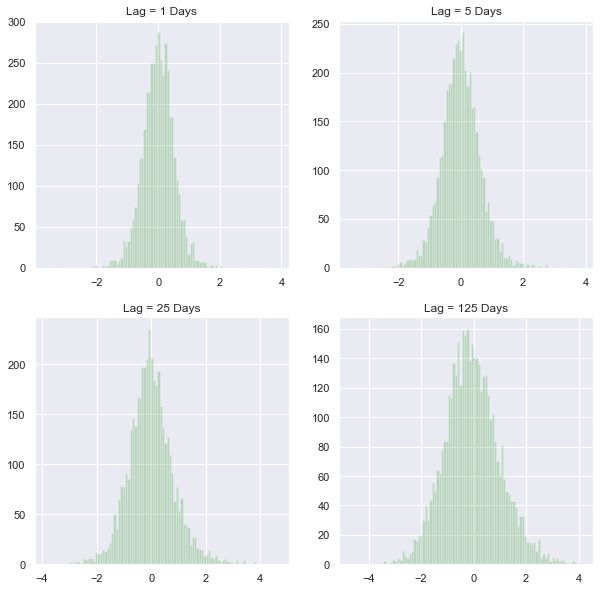

In [192]:
plotScaling(1,5)

In [227]:
nLags=500
delta=1
dates = rvdata.iloc[nLags:n-delta].index
i = np.arange(nLags)
cf = 1./((i + 1. / 2.) ** (h[0] + 1. / 2.) * (i + 1. / 2. + delta))
ldata = rvdata.truncate(after=date)


In [228]:
ldata.head(), ldata.tail() 

(             SPX2.rk
 2000-01-03  0.000161
 2000-01-04  0.000264
 2000-01-05  0.000305
 2000-01-06  0.000149
 2000-01-07  0.000123,
              SPX2.rk
 2010-05-04  0.000193
 2010-05-05  0.000157
 2010-05-06  0.002794
 2010-05-07  0.000843
 2010-05-10  0.000611)

In [229]:
l = len(ldata)
l

2703

In [231]:
ldata = np.log(ldata.iloc[l - nLags:])
ldata.head(), ldata.tail() 

(             SPX2.rk
 2008-06-10 -8.983135
 2008-06-11 -9.327216
 2008-06-12 -9.096761
 2008-06-13 -8.972735
 2008-06-16 -9.643295,
              SPX2.rk
 2010-05-04 -8.553459
 2010-05-05 -8.756934
 2010-05-06 -5.880441
 2010-05-07 -7.079110
 2010-05-10 -7.400287)

In [232]:
np.fliplr([cf])[0][:5], np.fliplr([cf])[0][-5:]

(array([4.00373654e-05, 4.01681436e-05, 4.02996125e-05, 4.04317773e-05,
        4.05646429e-05]),
 array([0.07056425, 0.10102228, 0.16051546, 0.30991996, 1.03119418]))

In [230]:
#ldata['cf'] = np.fliplr([cf])[0]

In [47]:
def c_tilde(h):
    return scsp.gamma(3. / 2. - h) / scsp.gamma(h + 1. / 2.) * scsp.gamma(2. - 2. * h)

def forecast_XTS(rvdata, h, date, nLags, delta, nu):
    i = np.arange(nLags)
    cf = 1./((i + 1. / 2.) ** (h + 1. / 2.) * (i + 1. / 2. + delta))
    ldata = rvdata.truncate(after=date)
    l = len(ldata)
    ldata = np.log(ldata.iloc[l - nLags:])
    ldata['cf'] = np.fliplr([cf])[0]
    # print ldata
    ldata = ldata.dropna()
    fcst = (ldata.iloc[:, 0] * ldata['cf']).sum() / sum(ldata['cf'])
    
    return math.exp(fcst + 2 * nu ** 2 * c_tilde(h) * delta ** (2 * h))

In [48]:
rvdata = pd.DataFrame(rv1['SPX2.rk'])
nu  = OxfordH['nu_est'][0] # Vol of vol estimate for SPX
h = OxfordH['h_est'][0] 
n = len(rvdata)
delta = 1
nLags = 500
dates = rvdata.iloc[nLags:n-delta].index
rv_predict = [forecast_XTS(rvdata, h=h, date=d, nLags=nLags,
                           delta=delta, nu=nu) for d in dates]
rv_actual = rvdata.iloc[nLags+delta:n].values

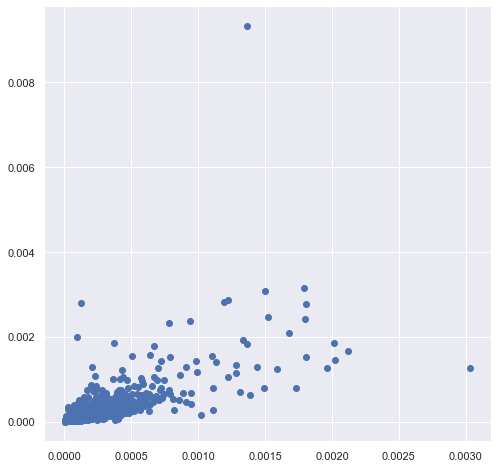

In [150]:
plt.figure(figsize=(8, 8))
plt.plot(rv_predict, rv_actual, 'bo');

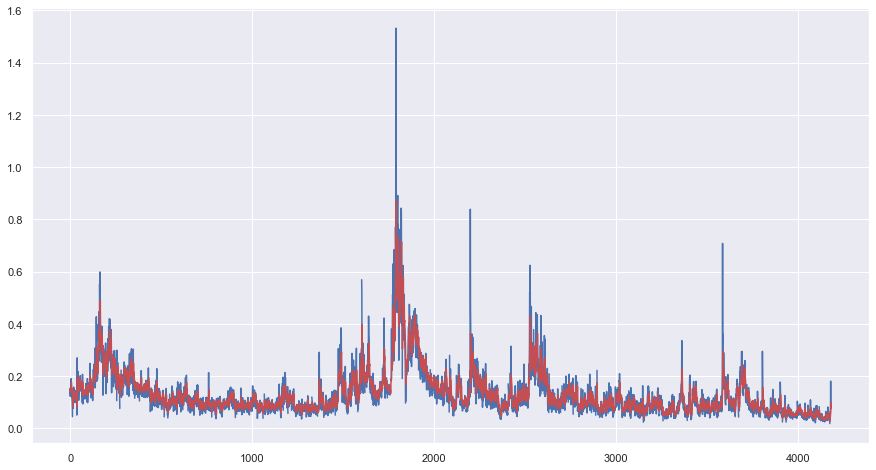

In [148]:
plt.figure(figsize=(15, 8))
vol_actual = np.sqrt(np.multiply(rv_actual,252))
vol_predict = np.sqrt(np.multiply(rv_predict,252))
plt.plot(vol_actual, "b")
plt.plot(vol_predict, "r");

In [52]:
def xi(date, tt, nu,h, tscale):  # dt=(u-t) is in units of years
    rvdata = pd.DataFrame(rv1['SPX2.rk'])
    return [ forecast_XTS(rvdata,h=h,date=date,nLags=500,delta=dt*tscale,nu=nu) for dt in tt]

nu = OxfordH["nu_est"][0]
h = OxfordH["h_est"][0]

def varSwapCurve(date, bigT, nSteps, nu, h, tscale, onFactor):
    # Make vector of fwd variances
    tt = [ float(i) * (bigT) / nSteps for i in range(nSteps+1)]
    delta_t = tt[1]
    xicurve = xi(date, tt, nu, h, tscale)
    xicurve_mid = (np.array(xicurve[0:nSteps]) + np.array(xicurve[1:nSteps+1])) / 2
    xicurve_int = np.cumsum(xicurve_mid) * delta_t
    varcurve1 = np.divide(xicurve_int, np.array(tt[1:]))
    varcurve = np.array([xicurve[0],]+list(varcurve1))
    varcurve = varcurve * onFactor * tscale #  onFactor is to compensate for overnight moves
    res = pd.DataFrame({"texp":np.array(tt), "vsQuote":np.sqrt(varcurve)})
    return(res)

In [54]:
from matplotlib.mlab import stineman_interp

ImportError: cannot import name 'stineman_interp' from 'matplotlib.mlab' (C:\Users\Rantanplan\Anaconda3\lib\site-packages\matplotlib\mlab.py)

In [57]:
def slopes(x,y):
    """
    :func:`slopes` calculates the slope *y*'(*x*)
    The slope is estimated using the slope obtained from that of a
    parabola through any three consecutive points.
    This method should be superior to that described in the appendix
    of A CONSISTENTLY WELL BEHAVED METHOD OF INTERPOLATION by Russel
    W. Stineman (Creative Computing July 1980) in at least one aspect:
      Circles for interpolation demand a known aspect ratio between
      *x*- and *y*-values.  For many functions, however, the abscissa
      are given in different dimensions, so an aspect ratio is
      completely arbitrary.
    The parabola method gives very similar results to the circle
    method for most regular cases but behaves much better in special
    cases.
    Norbert Nemec, Institute of Theoretical Physics, University or
    Regensburg, April 2006 Norbert.Nemec at physik.uni-regensburg.de
    (inspired by a original implementation by Halldor Bjornsson,
    Icelandic Meteorological Office, March 2006 halldor at vedur.is)
    """
    # Cast key variables as float.
    x=np.asarray(x, np.float_)
    y=np.asarray(y, np.float_)

    yp=np.zeros(y.shape, np.float_)

    dx=x[1:] - x[:-1]
    dy=y[1:] - y[:-1]
    dydx = dy/dx
    yp[1:-1] = (dydx[:-1] * dx[1:] + dydx[1:] * dx[:-1])/(dx[1:] + dx[:-1])
    yp[0] = 2.0 * dy[0]/dx[0] - yp[1]
    yp[-1] = 2.0 * dy[-1]/dx[-1] - yp[-2]
    return yp


def stineman_interp(xi,x,y,yp=None):
    """
    Given data vectors *x* and *y*, the slope vector *yp* and a new
    abscissa vector *xi*, the function :func:`stineman_interp` uses
    Stineman interpolation to calculate a vector *yi* corresponding to
    *xi*.
    Here's an example that generates a coarse sine curve, then
    interpolates over a finer abscissa::
      x = linspace(0,2*pi,20);  y = sin(x); yp = cos(x)
      xi = linspace(0,2*pi,40);
      yi = stineman_interp(xi,x,y,yp);
      plot(x,y,'o',xi,yi)
    The interpolation method is described in the article A
    CONSISTENTLY WELL BEHAVED METHOD OF INTERPOLATION by Russell
    W. Stineman. The article appeared in the July 1980 issue of
    Creative Computing with a note from the editor stating that while
    they were:
      not an academic journal but once in a while something serious
      and original comes in adding that this was
      "apparently a real solution" to a well known problem.
    For *yp* = *None*, the routine automatically determines the slopes
    using the :func:`slopes` routine.
    *x* is assumed to be sorted in increasing order.
    For values ``xi[j] < x[0]`` or ``xi[j] > x[-1]``, the routine
    tries an extrapolation.  The relevance of the data obtained from
    this, of course, is questionable...
    Original implementation by Halldor Bjornsson, Icelandic
    Meteorolocial Office, March 2006 halldor at vedur.is
    Completely reworked and optimized for Python by Norbert Nemec,
    Institute of Theoretical Physics, University or Regensburg, April
    2006 Norbert.Nemec at physik.uni-regensburg.de
    """

    # Cast key variables as float.
    x=np.asarray(x, np.float_)
    y=np.asarray(y, np.float_)
    assert x.shape == y.shape
    N=len(y)

    if yp is None:
        yp = slopes(x,y)
    else:
        yp=np.asarray(yp, np.float_)

    xi=np.asarray(xi, np.float_)
    yi=np.zeros(xi.shape, np.float_)

    # calculate linear slopes
    dx = x[1:] - x[:-1]
    dy = y[1:] - y[:-1]
    s = dy/dx  #note length of s is N-1 so last element is #N-2

    # find the segment each xi is in
    # this line actually is the key to the efficiency of this implementation
    idx = np.searchsorted(x[1:-1], xi)

    # now we have generally: x[idx[j]] <= xi[j] <= x[idx[j]+1]
    # except at the boundaries, where it may be that xi[j] < x[0] or xi[j] > x[-1]

    # the y-values that would come out from a linear interpolation:
    sidx = s.take(idx)
    xidx = x.take(idx)
    yidx = y.take(idx)
    xidxp1 = x.take(idx+1)
    yo = yidx + sidx * (xi - xidx)

    # the difference that comes when using the slopes given in yp
    dy1 = (yp.take(idx)- sidx) * (xi - xidx)       # using the yp slope of the left point
    dy2 = (yp.take(idx+1)-sidx) * (xi - xidxp1) # using the yp slope of the right point

    dy1dy2 = dy1*dy2
    # The following is optimized for Python. The solution actually
    # does more calculations than necessary but exploiting the power
    # of numpy, this is far more efficient than coding a loop by hand
    # in Python
    yi = yo + dy1dy2 * np.choose(np.array(np.sign(dy1dy2), np.int32)+1,
                                 ((2*xi-xidx-xidxp1)/((dy1-dy2)*(xidxp1-xidx)),
                                  0.0,
                                  1/(dy1+dy2),))
    return yi

In [58]:
def varSwapForecast(date,tau,nu,h,tscale,onFactor):
    vsc = varSwapCurve(date, bigT=2.5, nSteps=100, nu=nu, h=h,
                    tscale=tscale, onFactor=onFactor) # Creates the whole curve
    x = vsc['texp']
    y = vsc['vsQuote']
    res = stineman_interp(tau,x,y,None)

    return(res)

# Test the function

tau = (.25,.5,1,2)
date = dt.datetime(2008,9,8)
varSwapForecast(date,tau,nu=nu,h=h,tscale=252,onFactor=1)

array([0.21847666, 0.21268526, 0.21004282, 0.21033908])

In [60]:
varSwaps12 =(
    0.2872021, 0.2754535, 0.2601864, 0.2544684, 0.2513854, 0.2515314,
    0.2508418, 0.2520099, 0.2502763, 0.2503309, 0.2580933, 0.2588361, 
    0.2565093)

texp12 = (
    0.01916496, 0.04654346, 0.09582478, 0.19164956, 0.26830938, 0.29842574,
    0.51745380, 0.54483231, 0.76659822, 0.79397673, 1.26488706, 1.76317591, 
    2.26146475)

varSwaps15 = (
    0.4410505, 0.3485560, 0.3083603, 0.2944378, 0.2756881, 0.2747838, 
    0.2682212, 0.2679770, 0.2668113, 0.2706713, 0.2729533, 0.2689598, 
    0.2733176)

texp15 = (
    0.01095140, 0.03832991, 0.08761123, 0.18343600, 0.26009582, 0.29021218, 
    0.50924025, 0.53661875, 0.75838467, 0.78576318, 1.25667351, 1.75496235, 
    2.25325120)

In [61]:
nu = OxfordH['nu_est'][0]
h = OxfordH['h_est'][0]
date1 = dt.datetime(2008, 9, 12)
date2 = dt.datetime(2008, 9, 15)

# Variance curve fV model forecasts
tau1000 = [ float(i) * 2.5 / 1000. for i in range(1,1001)]
vs1 = varSwapForecast(date1, tau1000, nu=nu,h=h, tscale=252, onFactor=1.29)
vs2 = varSwapForecast(date2, tau1000, nu=nu,h=h, tscale=252, onFactor=1.29)

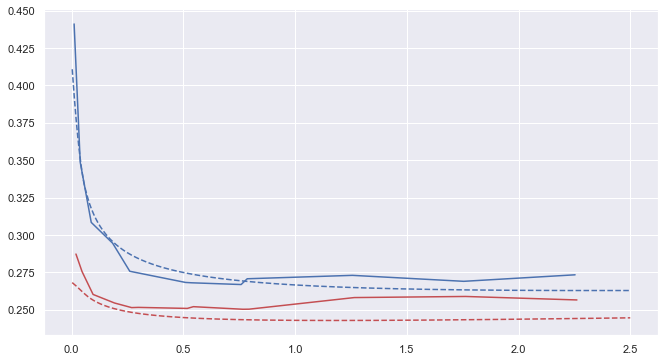

In [62]:
plt.figure(figsize=(11, 6))
plt.plot(texp12, varSwaps12, "r")
plt.plot(texp15, varSwaps15, "b")
plt.plot(tau1000, vs1, "r--")
plt.plot(tau1000, vs2, "b--");

In [63]:
varSwaps5 = (
    0.4250369, 0.2552473, 0.2492892, 0.2564899, 0.2612677, 0.2659618, 0.2705928, 0.2761203,
    0.2828139, 0.2841165, 0.2884955, 0.2895839, 0.2927817, 0.2992602, 0.3116500)

texp5 = (
    0.002737851, 0.043805613, 0.120465435, 0.150581793, 0.197125257, 0.292950034,
    0.369609856, 0.402464066, 0.618754278, 0.654346338, 0.867898700, 0.900752909,
    1.117043121, 1.615331964, 2.631074606)
 
varSwaps7 = (
    0.5469727, 0.4641713, 0.3963352, 0.3888213, 0.3762354, 0.3666858, 0.3615814, 0.3627013,
    0.3563324, 0.3573946, 0.3495730, 0.3533829, 0.3521515, 0.3506186, 0.3594066)

texp7 = (
    0.01642710, 0.03832991, 0.11498973, 0.14510609, 0.19164956, 0.28747433, 0.36413415,
    0.39698836, 0.61327858, 0.64887064, 0.86242300, 0.89527721, 1.11156742, 1.60985626,
    2.62559890)

varSwaps10 = (
    0.3718439, 0.3023223, 0.2844810, 0.2869835, 0.2886912, 0.2905637, 0.2957070, 0.2960737,
    0.3005086, 0.3031188, 0.3058492, 0.3065815, 0.3072041, 0.3122905, 0.3299425)

texp10 = (
    0.008213552, 0.030116359, 0.106776181, 0.136892539, 0.183436003, 0.279260780,
    0.355920602, 0.388774812, 0.605065024, 0.640657084, 0.854209446, 0.887063655,
    1.103353867, 1.601642710, 2.617385352)

In [64]:
date1 = dt.datetime(2010, 5, 5)
date2 = dt.datetime(2010, 5, 7)

vsf5 = varSwapCurve(date1, bigT=2.5, nSteps=100, nu=nu, h=h, tscale=252, onFactor=2.52)
vsf7 = varSwapCurve(date2, bigT=2.5, nSteps=100, nu=nu, h=h, tscale=252, onFactor=2.52)

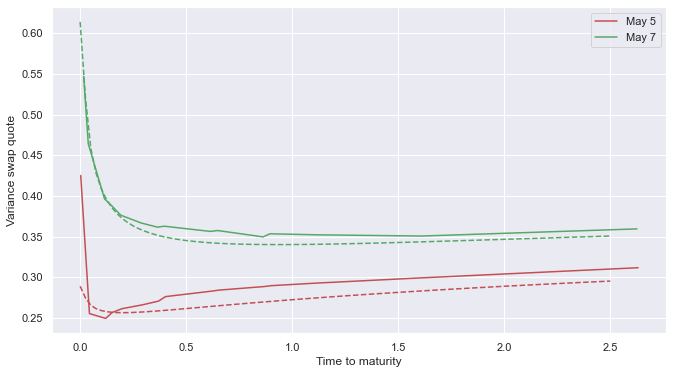

In [65]:
plt.figure(figsize=(11, 6))
plt.plot(texp5, varSwaps5, "r", label='May 5')
plt.plot(texp7, varSwaps7, "g", label='May 7')

plt.legend()
plt.xlabel("Time to maturity")
plt.ylabel("Variance swap quote")

plt.plot(vsf5['texp'], vsf5['vsQuote'], "r--")
plt.plot(vsf7['texp'], vsf7['vsQuote'], "g--");

In [66]:
date1 = dt.datetime(2010,5,7)
date2 = dt.datetime(2010,5,10)

vsf7 = varSwapCurve(date1, bigT=2.5, nSteps=100, nu=nu, h=h, tscale=252, onFactor=2.52)
vsf10 = varSwapCurve(date2, bigT=2.5, nSteps=100, nu=nu, h=h, tscale=252, onFactor=2.52)

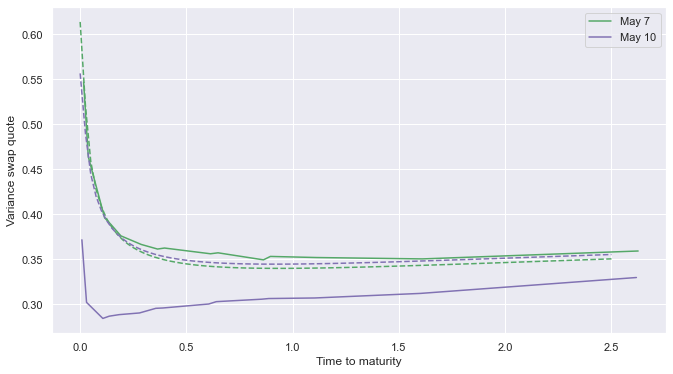

In [67]:
plt.figure(figsize=(11, 6))
plt.plot(texp7, varSwaps7, "g", label='May 7')
plt.plot(texp10, varSwaps10, "m", label='May 10')

plt.legend()
plt.xlabel("Time to maturity")
plt.ylabel("Variance swap quote")

plt.plot(vsf7['texp'], vsf7['vsQuote'], "g--")
plt.plot(vsf10['texp'], vsf10['vsQuote'], "m--");

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

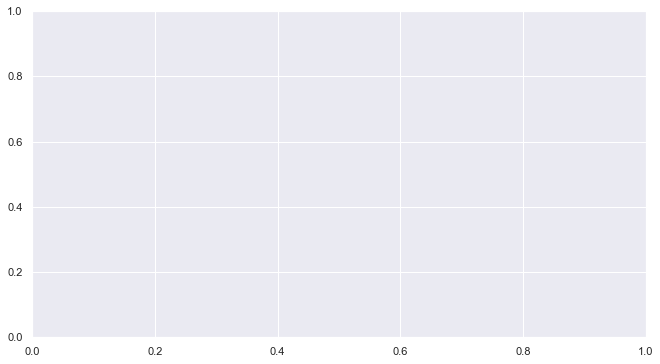

In [68]:
plt.figure(figsize=(11, 6))
ax = plt.subplot(111)
rvdata_p = rvdata.drop((dt.datetime(2010, 5, 6)), axis=0)
rvdata.loc["2010-05-04":"2010-05-10"].plot(ax=ax, legend=False)
rvdata_p.loc["2010-05-04":"2010-05-10"].plot(ax=ax, legend=False);

In [69]:
def xip(date, tt, nu,h, tscale):  # dt=(u-t) is in units of years
    rvdata = pd.DataFrame(rv1['SPX2.rk'])
    rvdata_p = rvdata.drop((dt.datetime(2010, 5, 6)), axis=0)
    return [ forecast_XTS(rvdata_p, h=h, date=date,nLags=500,
                          delta=delta_t * tscale, nu=nu) for delta_t in tt]

nu = OxfordH["nu_est"][0]
h = OxfordH["h_est"][0]

def varSwapCurve_p(date, bigT, nSteps, nu, h, tscale, onFactor):
  # Make vector of fwd variances
  tt = [ float(i) * (bigT) / nSteps for i in range(nSteps+1)]
  delta_t = tt[1]
  xicurve = xip(date, tt, nu, h, tscale)
  xicurve_mid = (np.array(xicurve[0:nSteps]) + np.array(xicurve[1:nSteps + 1])) / 2
  xicurve_int = np.cumsum(xicurve_mid) * delta_t
  varcurve1 = np.divide(xicurve_int, np.array(tt[1:]))
  varcurve = np.array([xicurve[0],]+list(varcurve1))
  varcurve = varcurve * onFactor * tscale #  onFactor is to compensate for overnight moves
  res = pd.DataFrame({"texp":np.array(tt), "vsQuote":np.sqrt(varcurve)})
  return(res)

def varSwapForecast_p(date, tau, nu, h, tscale, onFactor):
  vsc = varSwapCurve_p(date, bigT=2.5, nSteps=100, nu=nu, h=h,
                    tscale=tscale, onFactor=onFactor) # Creates the whole curve
  x = vsc['texp']
  y = vsc['vsQuote']
  res = stineman_interp(tau, x, y, None)

  return(res)

# Test the function

tau = (.25, .5 ,1, 2)
date = dt.datetime(2010, 5, 10)
varSwapForecast_p(date, tau, nu=nu, h=h, tscale=252, onFactor=1. / (1 - .35))

array([0.25945616, 0.25100875, 0.2510396 , 0.25852234])

In [70]:
date1 = dt.datetime(2010, 5, 7)
date2 = dt.datetime(2010, 5, 10)

vsf7 = varSwapCurve(date1, bigT=2.5, nSteps=100, nu=nu, h=h, tscale=252, onFactor=2.52)
vsf10p = varSwapCurve_p(date2, bigT=2.5, nSteps=100, nu=nu, h=h, tscale=252, onFactor=2.52)

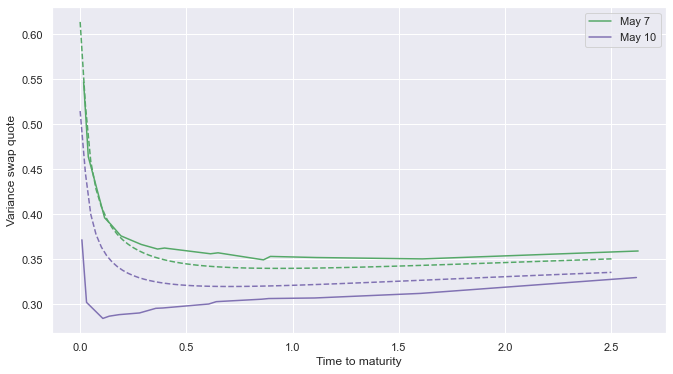

In [71]:
plt.figure(figsize=(11, 6))
plt.plot(texp7, varSwaps7, "g", label='May 7')
plt.plot(texp10, varSwaps10, "m", label='May 10')

plt.legend()
plt.xlabel("Time to maturity")
plt.ylabel("Variance swap quote")

plt.plot(vsf7['texp'], vsf7['vsQuote'], "g--")
plt.plot(vsf10p['texp'], vsf10p['vsQuote'], "m--");